In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape, add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import regularizers
from skimage.util import random_noise
import cv2
import keras
import os
import pickle
from keras.models import model_from_json
import json
from PIL import Image, ImageFilter

In [51]:
PATH=r'B:\Major\model'
os.listdir(PATH)

['smudge_autoencoder.json',
 'smudge_autoencoderV2.json',
 'smudge_autoencoder_weights.h5',
 'smudge_autoencoder_weightsV2.h5']

In [52]:
PATH2=r'B:\Major\datast'
os.listdir(PATH2)

['filter_output_in4.png',
 'in.png',
 'in2.png',
 'in3.png',
 'in4.png',
 'output_in.png']

In [53]:
model = 'smudge_autoencoderV2.json'
weight = 'smudge_autoencoder_weightsV2.h5'

In [54]:
slice_size = 256
input_file_name = 'in4.png'
print("{}\{}".format(PATH2, input_file_name))

B:\Major\datast\in4.png


(3663, 2491)

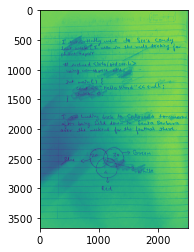

In [55]:
img = cv2.imread("{}\{}".format(PATH2, input_file_name), 0)
plt.imshow(img)
v_res = img.shape[0]
h_res = img.shape[1]
img.shape

In [56]:
def count_blocks(res, slice_size):
  blocks = 0
  if res % slice_size == 0:
    blocks = int(res/slice_size)
  else:
    blocks = (int(res/slice_size)) + 1
  return blocks

In [57]:
def resizeImage(img, v_res, h_res, slice_size):
  v_res = count_blocks(v_res, slice_size) * slice_size
  h_res = count_blocks(h_res, slice_size) * slice_size
  img = cv2.resize(img, (h_res, v_res))
  print(v_res)
  print(h_res)
  return img

3840
2560


(3840, 2560)

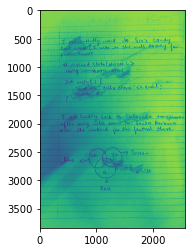

In [58]:
img = resizeImage(img, v_res, h_res, slice_size)
plt.imshow(img)
img.shape

In [59]:
json_file = open(r'{}\{}'.format(PATH, model), 'r')
json_model = model_from_json(json_file.read())
json_model.load_weights(r'{}\{}'.format(PATH, weight))

In [60]:
# json_file.seek(0)
# json_file.read()

In [61]:
column = count_blocks(h_res, slice_size)
rows = count_blocks(v_res, slice_size)
print(column)
print(rows)

normalImg = img
newImg = None

hor_split_image = np.hsplit(normalImg, column)
for i in hor_split_image:
    v_split = np.vsplit(i, rows)
    cleanHor = None
    for j in v_split:
        smallClean = json_model.predict(j.reshape(1,256,256,1)).reshape(256, 256)
        if cleanHor is None:
            cleanHor = smallClean
        else:
            cleanHor = np.concatenate((cleanHor, smallClean), axis=0)
    if newImg is None:
        newImg = cleanHor
    else:
        newImg = np.concatenate((newImg, cleanHor), axis=1)

10
15


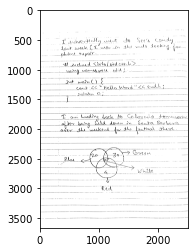

In [62]:
newImg = newImg.reshape(img.shape[0], img.shape[1])
newImg = cv2.resize(newImg, (h_res, v_res))
plt.imshow(newImg, cmap='gray')

In [63]:
cv2.imwrite(r'{}\output_{}'.format(PATH2, input_file_name), newImg*255)

True

In [64]:
image = cv2.imread(r'{}\output_{}'.format(PATH2, input_file_name))
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

figure_size = 9
image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image2 = Image.fromarray(image2.astype('uint8'))

new_image = image2.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

cv2.imwrite(r'{}\filter_{}'.format(PATH2, input_file_name), np.array(new_image))

True